In [1]:
!apt-get install poppler.utils
#PDF randering Software

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'poppler-utils' for regex 'poppler.utils'
Note, selecting 'xpoppler-utils' for regex 'poppler.utils'
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (210 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-

In [2]:
!pip install pdf2image
!pip install easyocr
#OCR read data from images

     |████████████████████████████████| 63.2MB 68kB/s 


In [3]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [4]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [36]:
images = convert_from_path('/content/Sample2.pdf')

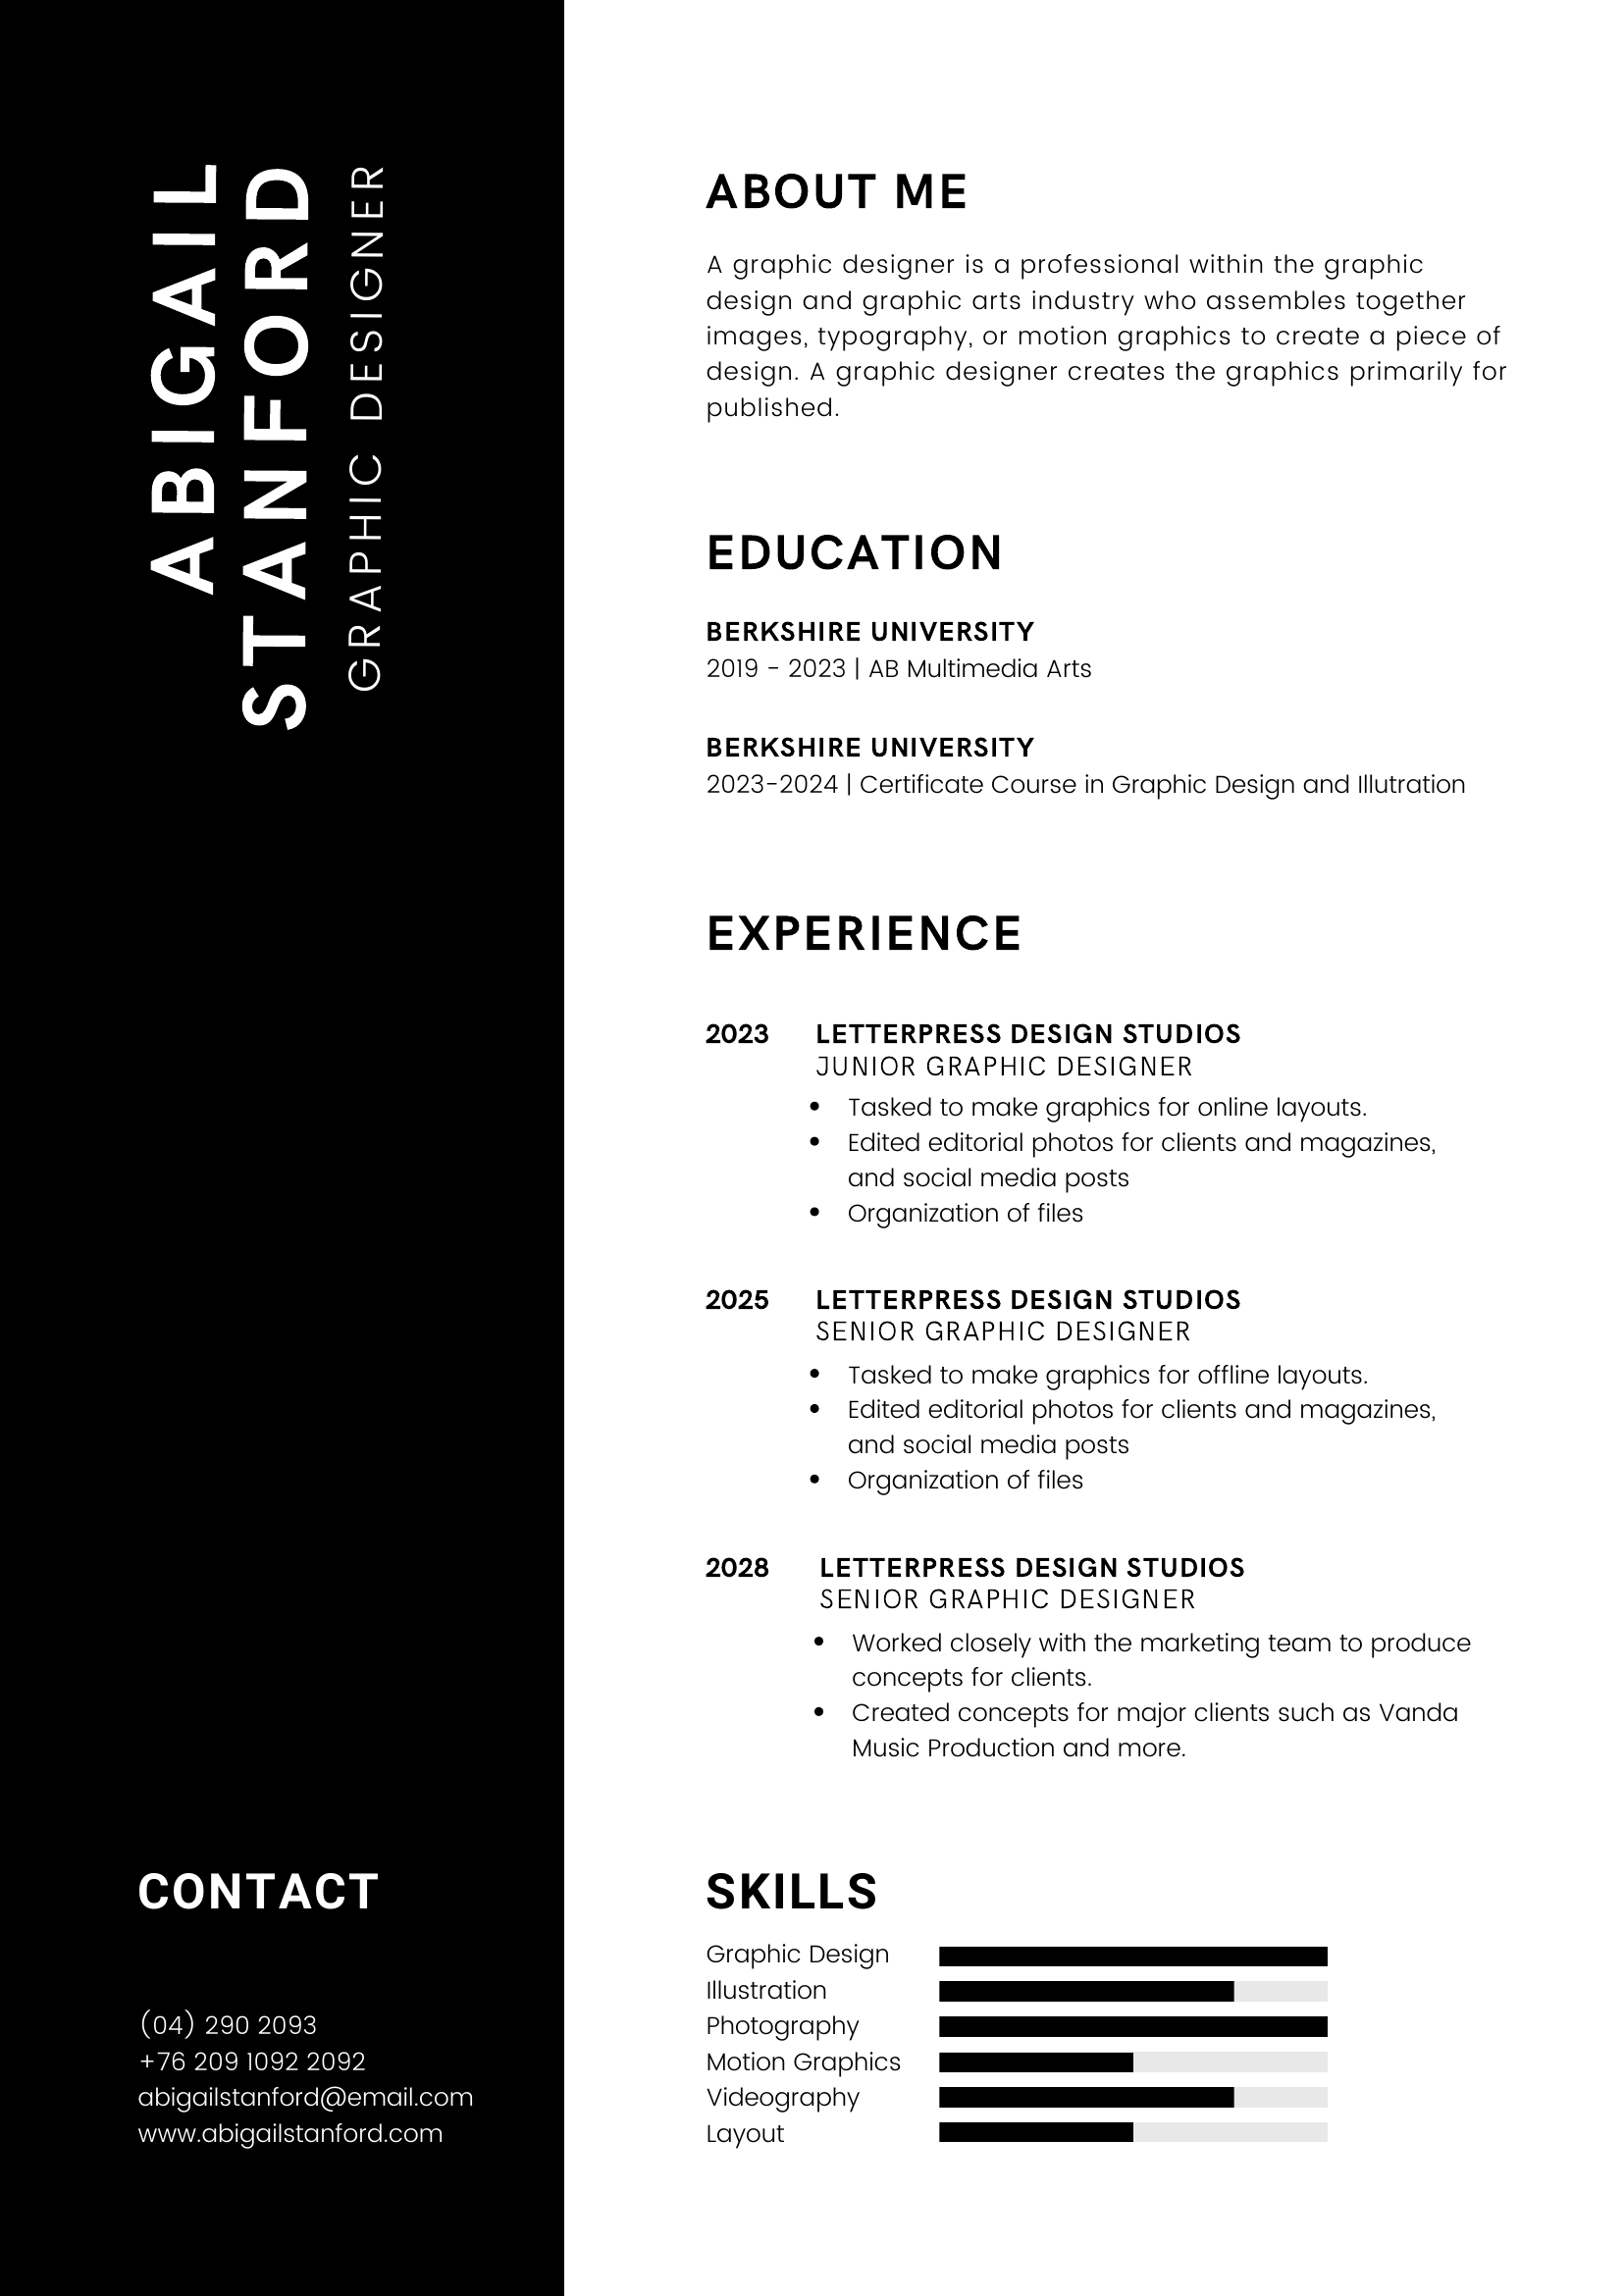

In [37]:
from IPython.display import display, Image
display(images[0])

In [38]:
array = reader.readtext(np.array(images[0]),min_size=0, slope_ths=0.2,decoder='beamsearch')
array

[([[720, 170], [990, 170], [990, 222], [720, 222]],
  'ABOUT ME',
  0.9984631194973674),
 ([[721, 261], [737, 261], [737, 281], [721, 281]], 'A', 0.9984623149014169),
 ([[743, 248], [1457, 248], [1457, 292], [743, 292]],
  'graphic designer is a professional within the graphic',
  0.7682529228260426),
 ([[348, 162], [396, 162], [396, 432], [348, 432]], '1', 0.7197081194722301),
 ([[716, 288], [1501, 288], [1501, 329], [716, 329]],
  'design and graphic arts industry who assembles together',
  0.9730276558693443),
 ([[713, 325], [993, 325], [993, 366], [713, 366]],
  'images, typography;',
  0.9319990998084365),
 ([[998, 328], [1134, 328], [1134, 358], [998, 358]],
  'or motion',
  0.9976353579764276),
 ([[1133, 323], [1535, 323], [1535, 368], [1133, 368]],
  'graphics to create a piece of',
  0.7939901658992911),
 ([[145, 157], [233, 157], [233, 603], [145, 603]], '1', 0.6677125893509164),
 ([[717, 363], [821, 363], [821, 401], [717, 401]],
  'design.',
  0.6251129310164711),
 ([[827, 

In [39]:
array[0]

([[720, 170], [990, 170], [990, 222], [720, 222]],
 'ABOUT ME',
 0.9984631194973674)

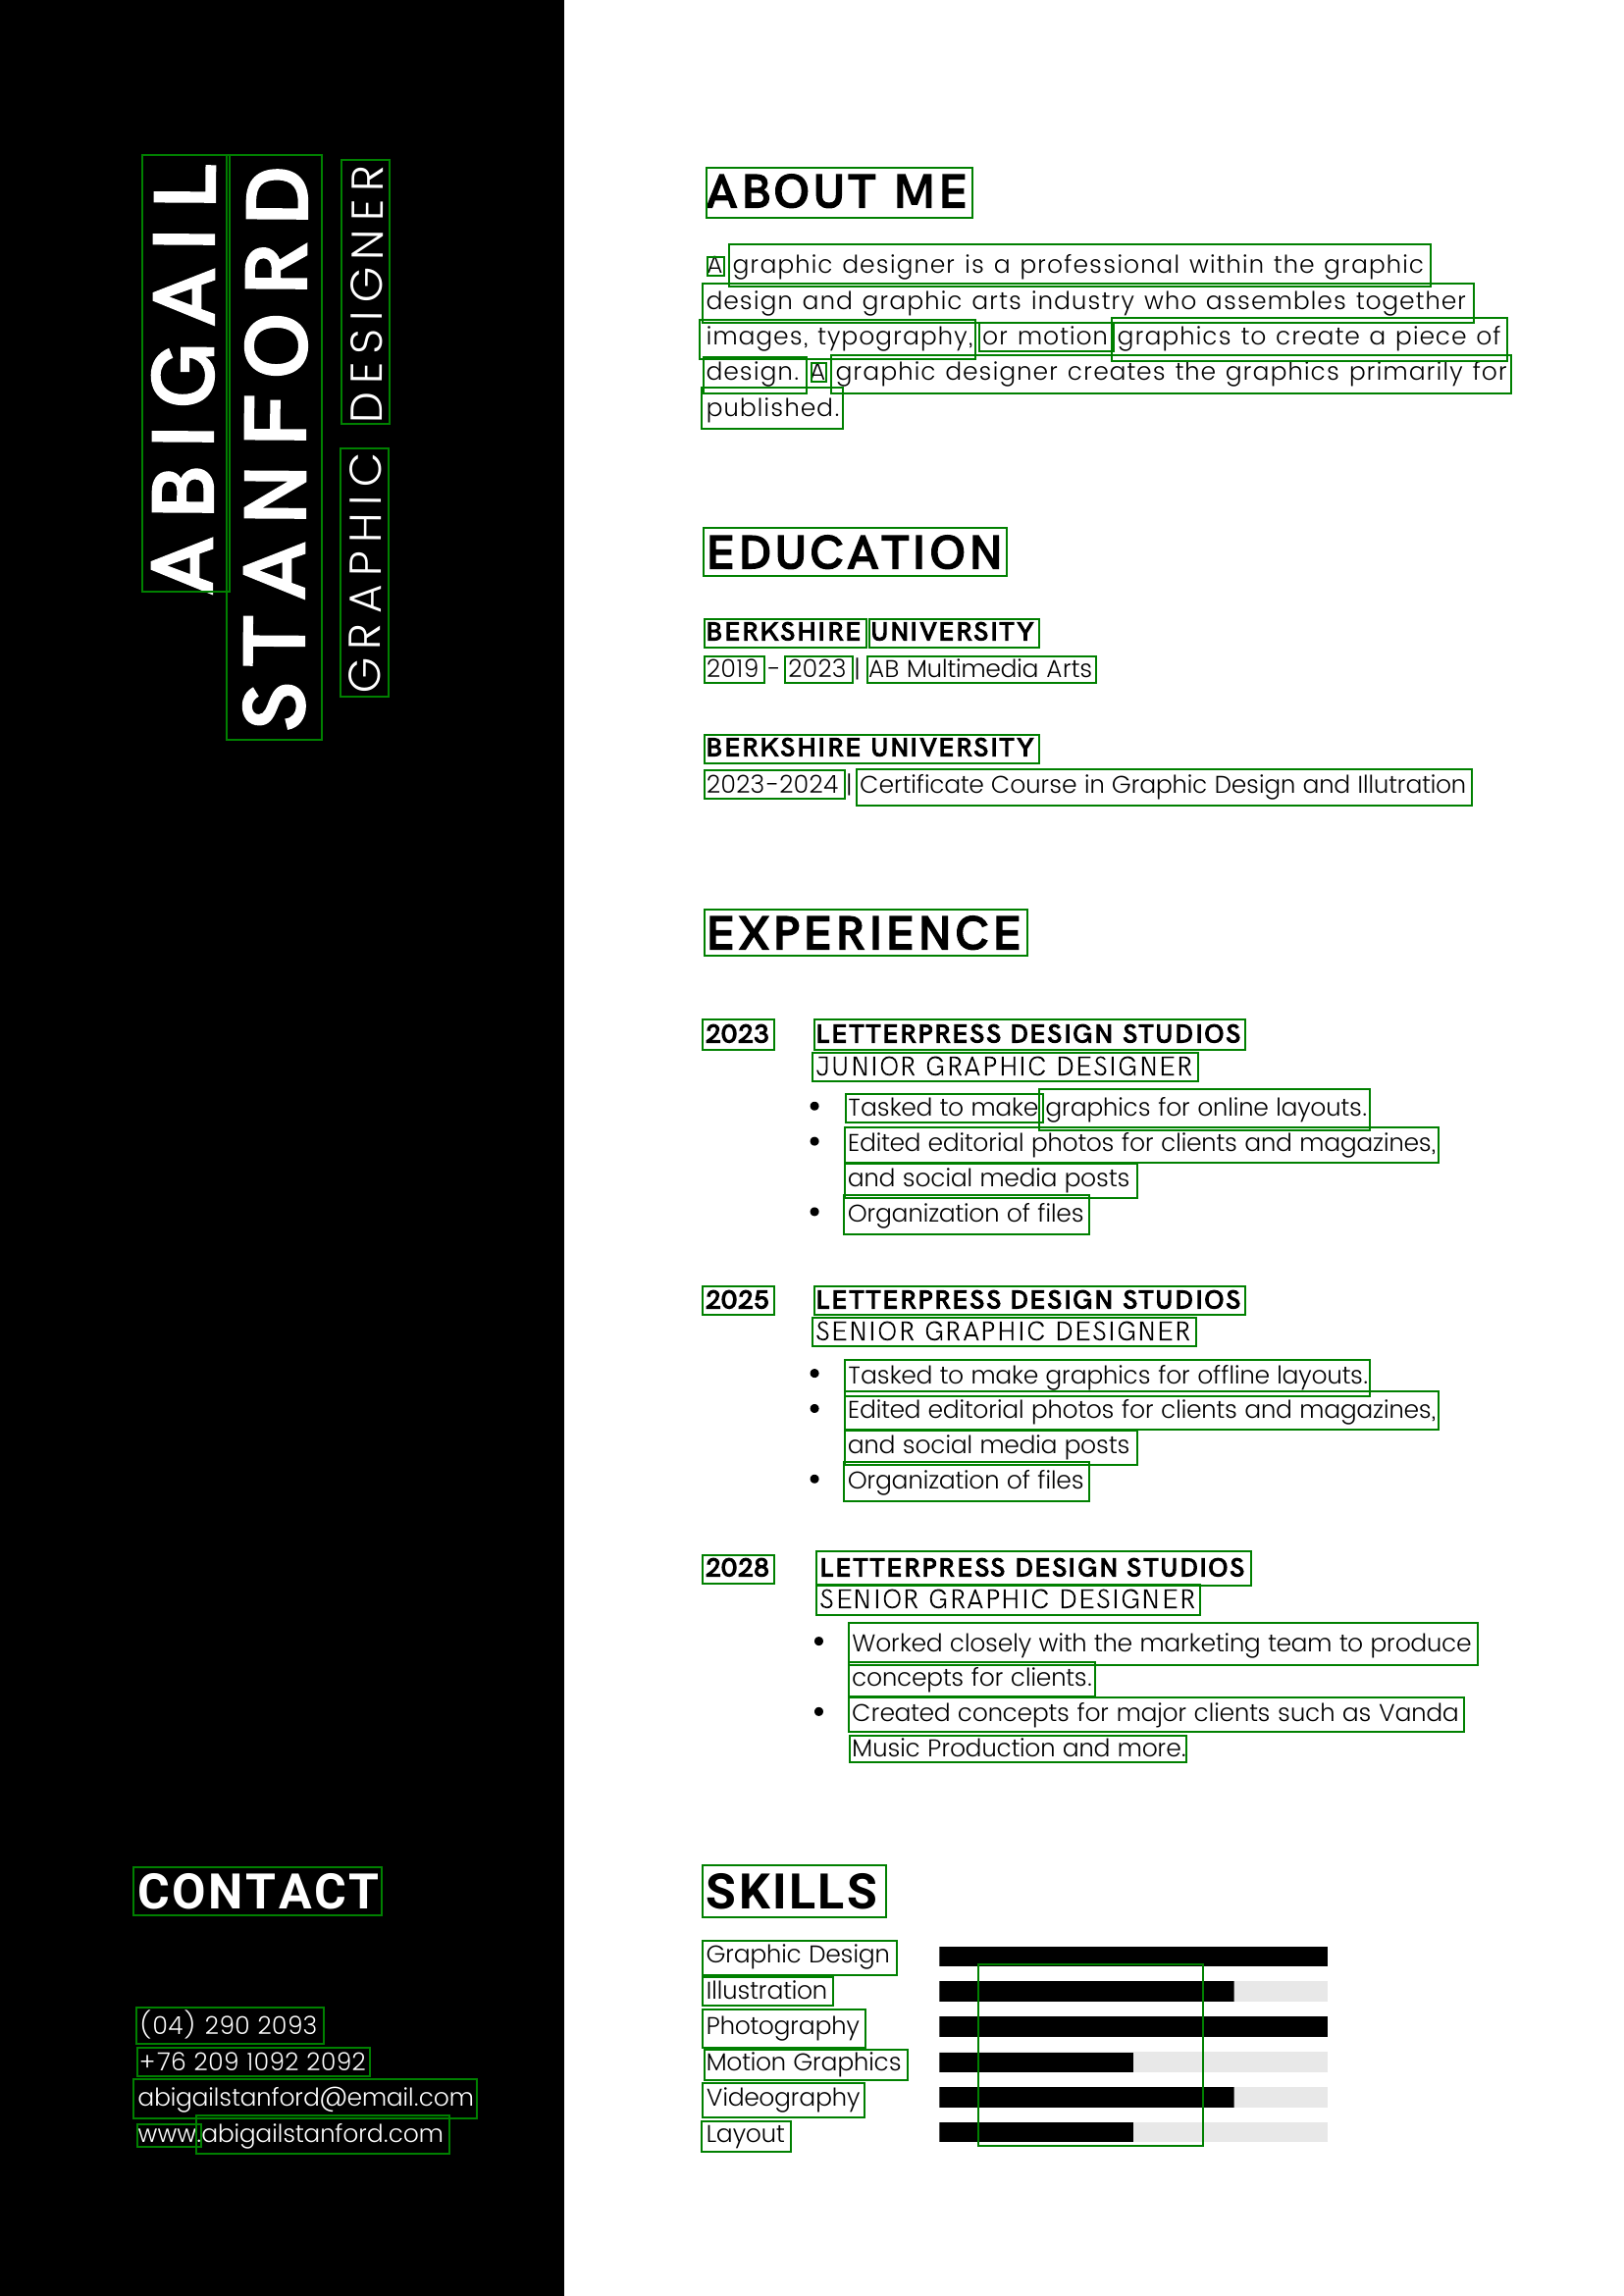

In [41]:
def draw_boxes(image, bounds, color='green', width=2):
  draw = ImageDraw.Draw(image)
  for arr in array:
    p0,p1,p2,p3 = arr[0]
    draw.line([*p0, *p1,*p2,*p3,*p0], fill= color, width = width)
  return image

draw_boxes(images[0], array)

In [42]:
array[1][1]

'A'

In [43]:
text=''
for i in range(len(array)):
  text = text + array[i][1] +'\n'

text

'ABOUT ME\nA\ngraphic designer is a professional within the graphic\n1\ndesign and graphic arts industry who assembles together\nimages, typography;\nor motion\ngraphics to create a piece of\n1\ndesign.\n4\ngraphic designer creates the graphics primarily for\npublished:\n\n1\nBERKSHIRE\nEDUCATION\nUNIVERSITY\n2019\n2023\nAB Multimedia Arts\nBERKSHIRE UNIVERSITY\n2023-2024\nCertificate Course in Graphic Design and Illutration\nEXPERIENCE\n2023\nLETTERPRESS DESIGN STUDIOS\nJUNIOR GRAPHIC DESIGNER\nTasked to make\ngraphics for online layouts:\nEdited editorial photos for clients and magazines,\nand social media posts\nOrganization of files\n2025\nLETTERPRESS DESIGN STUDIOS\nSENIOR GRAPHIC DESIGNER\nTasked to make graphics for offline layouts:\nEdited editorial photos for clients and magazines,\nand social media posts\nOrganization of files\n2028\nLETTERPRESS DESIGN STUDIOS\nSENIOR GRAPHIC DESIGNER\nWorked closely with the marketing team to produce\nconcepts for clients.\nCreated concepts 

In [44]:
nlp = spacy.load('en_core_web_sm')

In [45]:
doc= nlp(text)
doc

ABOUT ME
A
graphic designer is a professional within the graphic
1
design and graphic arts industry who assembles together
images, typography;
or motion
graphics to create a piece of
1
design.
4
graphic designer creates the graphics primarily for
published:

1
BERKSHIRE
EDUCATION
UNIVERSITY
2019
2023
AB Multimedia Arts
BERKSHIRE UNIVERSITY
2023-2024
Certificate Course in Graphic Design and Illutration
EXPERIENCE
2023
LETTERPRESS DESIGN STUDIOS
JUNIOR GRAPHIC DESIGNER
Tasked to make
graphics for online layouts:
Edited editorial photos for clients and magazines,
and social media posts
Organization of files
2025
LETTERPRESS DESIGN STUDIOS
SENIOR GRAPHIC DESIGNER
Tasked to make graphics for offline layouts:
Edited editorial photos for clients and magazines,
and social media posts
Organization of files
2028
LETTERPRESS DESIGN STUDIOS
SENIOR GRAPHIC DESIGNER
Worked closely with the marketing team to produce
concepts for clients.
Created concepts for major clients such as Vanda
Music Producti

In [46]:
from spacy import displacy
displacy.render(nlp(doc.text),style='ent', jupyter=True)